<a href="https://colab.research.google.com/github/priyankanarwade/Machine_Learning_Project/blob/main/Forest_coverage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**forest coverage classification**

In [ ]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# load dataset
df = pd.read_csv('https://raw.githubusercontent.com/pranavn91/PDF/main/dataset.csv')

In [ ]:
# explore dataset
df.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,5


In [ ]:
df = df.drop(['Id'],axis=1)

In [ ]:
# checking rows and columns
df.shape

(15120, 55)

In [ ]:
# check data type, null values 
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 55 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Elevation                           15120 non-null  int64
 1   Aspect                              15120 non-null  int64
 2   Slope                               15120 non-null  int64
 3   Horizontal_Distance_To_Hydrology    15120 non-null  int64
 4   Vertical_Distance_To_Hydrology      15120 non-null  int64
 5   Horizontal_Distance_To_Roadways     15120 non-null  int64
 6   Hillshade_9am                       15120 non-null  int64
 7   Hillshade_Noon                      15120 non-null  int64
 8   Hillshade_3pm                       15120 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  15120 non-null  int64
 10  Wilderness_Area1                    15120 non-null  int64
 11  Wilderness_Area2                    15120 non-null  int64
 12  Wild

In [ ]:
df_cover = df.groupby('Cover_Type')
df_cover

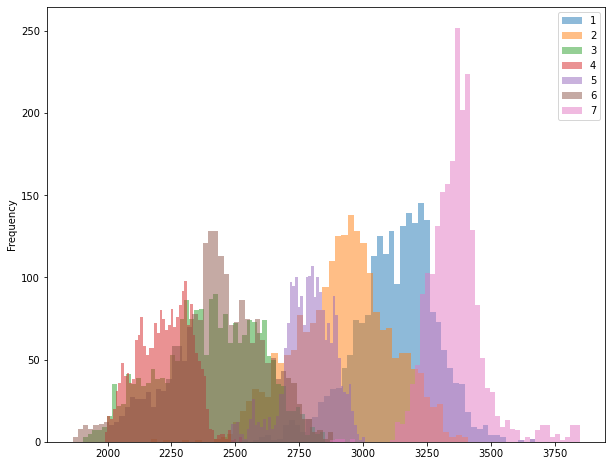

In [ ]:
plt.figure(figsize=(10,8))
df_cover['Elevation'].plot.hist(bins=50, alpha=0.5)
plt.legend(loc='upper right')

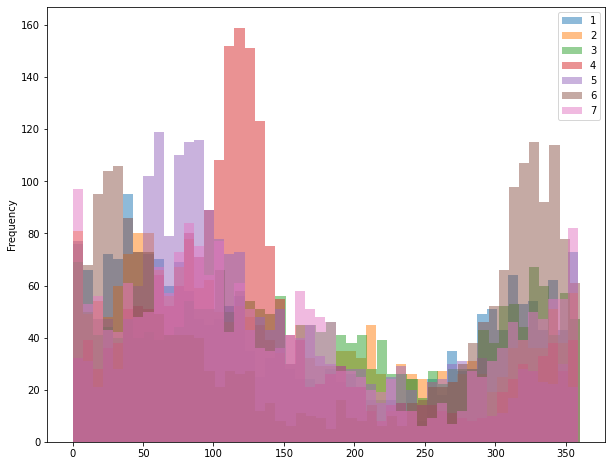

In [ ]:
plt.figure(figsize=(10,8))
df_cover['Aspect'].plot.hist(bins=50, alpha=0.5)
plt.legend(loc='upper right')

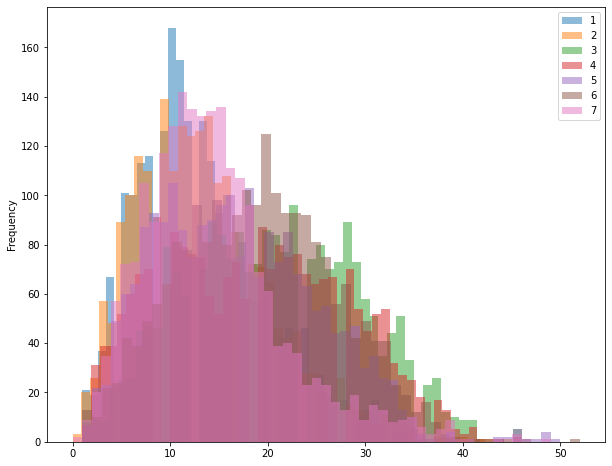

In [ ]:
plt.figure(figsize=(10,8))
df_cover['Slope'].plot.hist(bins=50, alpha=0.5)
plt.legend(loc='upper right')

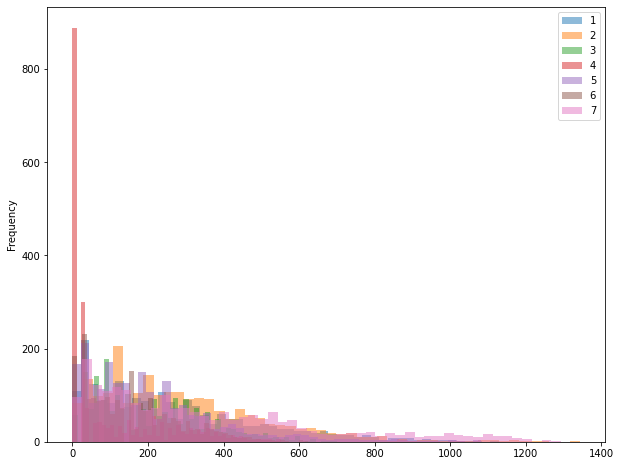

In [ ]:
plt.figure(figsize=(10,8))
df_cover['Horizontal_Distance_To_Hydrology'].plot.hist(bins=50, alpha=0.5)
plt.legend(loc='upper right')

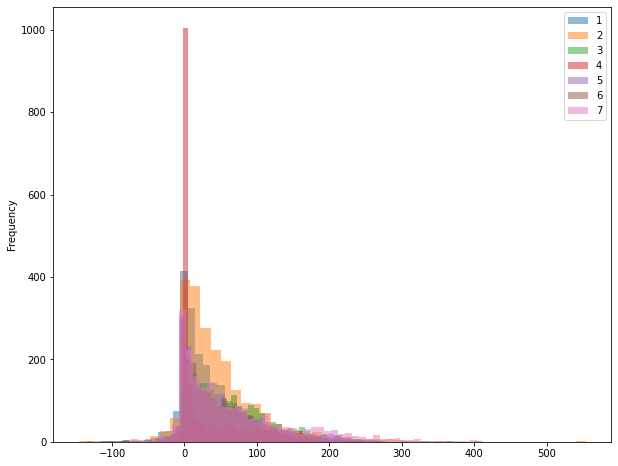

In [ ]:
plt.figure(figsize=(10,8))
df_cover['Vertical_Distance_To_Hydrology'].plot.hist(bins=50, alpha=0.5)
plt.legend(loc='upper right')

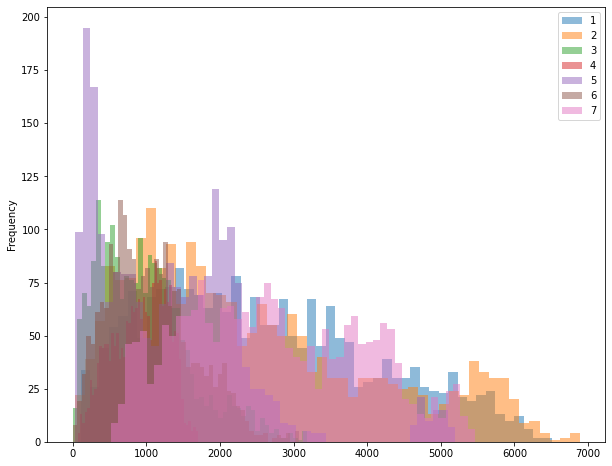

In [ ]:
plt.figure(figsize=(10,8))
df_cover['Horizontal_Distance_To_Roadways'].plot.hist(bins=50, alpha=0.5)
plt.legend(loc='upper right')

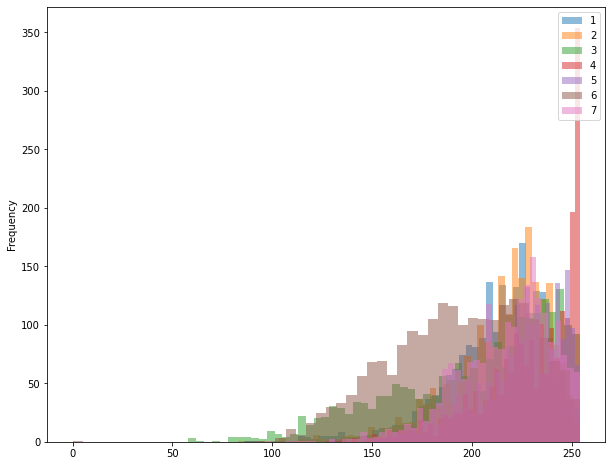

In [ ]:
plt.figure(figsize=(10,8))
df_cover['Hillshade_9am'].plot.hist(bins=50, alpha=0.5)
plt.legend(loc='upper right')

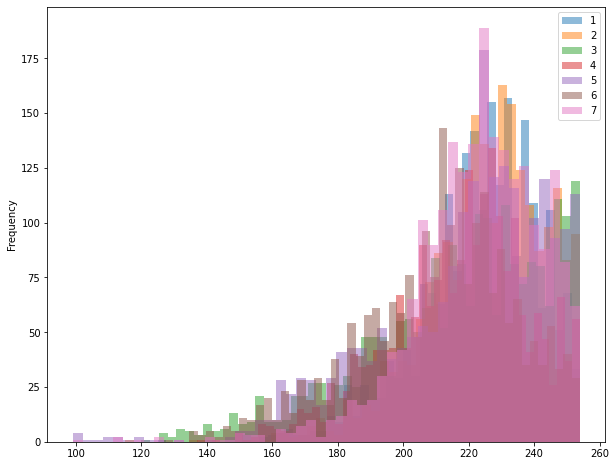

In [ ]:
plt.figure(figsize=(10,8))
df_cover['Hillshade_Noon'].plot.hist(bins=50, alpha=0.5)
plt.legend(loc='upper right')

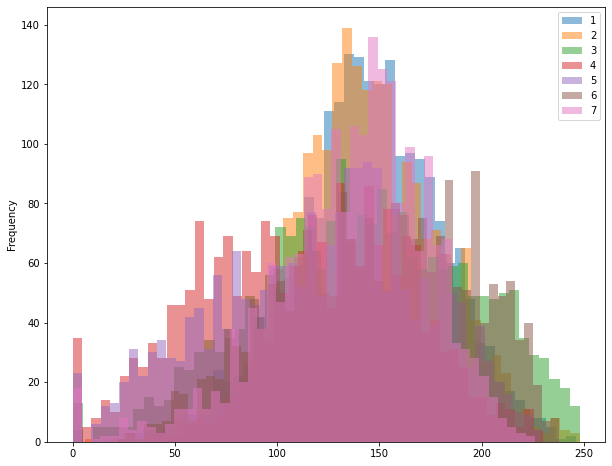

In [ ]:
plt.figure(figsize=(10,8))
df_cover['Hillshade_3pm'].plot.hist(bins=50, alpha=0.5)
plt.legend(loc='upper right')

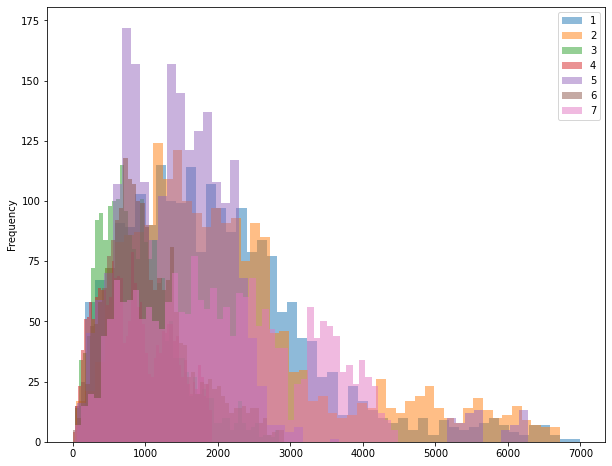

In [ ]:
plt.figure(figsize=(10,8))
df_cover['Horizontal_Distance_To_Fire_Points'].plot.hist(bins=50, alpha=0.5)
plt.legend(loc='upper right')

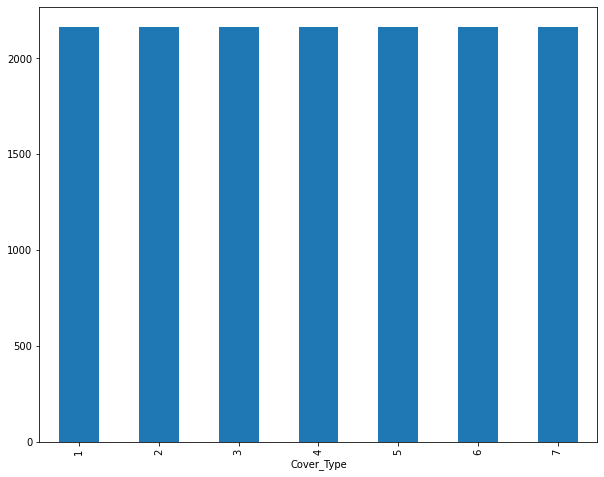

In [ ]:
plt.figure(figsize=(10,8))
df_cover.size().plot(kind='bar') #countplot of dependant veriables gives us imbalace of each group

In [ ]:
X = df.drop(columns=['Cover_Type'])
y = df['Cover_Type']

In [ ]:
print(X.shape)
print( y.shape)

(15120, 54)
(15120,)


In [ ]:
# normalizing data
from sklearn.preprocessing import MinMaxScaler
mn = MinMaxScaler()


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=111, stratify=y)

In [ ]:
#fit the scaling on the train dataset and return the scaleddataset
X_train = mn.fit_transform(X_train)
#transformthe test dataset with the scaler fitted on the train dataset
X_test = mn.transform(X_test)

In [ ]:
X_train = pd.DataFrame(X_train ,columns=X.columns)
X_test = pd.DataFrame (X_test, columns=X.columns)

In [ ]:
print('Dimention of X_train',X_train.shape)
print('Dimention of X_test',X_test.shape)
print('Dimention of y_train',y_train.shape)
print('Dimention of y_test',y_test.shape)

Dimention of X_train (12096, 54)
Dimention of X_test (3024, 54)
Dimention of y_train (12096,)
Dimention of y_test (3024,)


In [ ]:
y_train

4811     5
8722     6
7099     5
1417     2
10947    3
        ..
3964     4
14807    7
10574    2
14356    1
11855    1
Name: Cover_Type, Length: 12096, dtype: int64

**KNN classification****

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,accuracy_score, roc_auc_score

In [ ]:
knn = KNeighborsClassifier()
param_grid = {'n_neighbors':[1,3,5,7,9,11,13,15,17,21],
             'metric':['euclidean','manhattan','minkowaski'],
             'weights':['uniform','distance']}

gs = GridSearchCV(estimator = knn, param_grid= param_grid,scoring='accuracy',cv = 5, n_jobs = -1, verbose=2 )

gs.fit(X_train,y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
100 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py", line 198, in fit
    return self._fit(X, y)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_base.py", line 437, in _fit
    self._check_algorithm_metric()
  File "/usr/local/lib/python3.7/dist-packages/sklearn/n

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowaski'],
                         'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 21],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=2)

In [ ]:
gs.best_estimator_

KNeighborsClassifier(metric='manhattan', n_neighbors=3, weights='distance')

In [ ]:
y_pred_knn = gs.best_estimator_.predict(X_test)
y_pred_knn_train = gs.best_estimator_.predict(X_train)

In [ ]:
print('accuracy score test:',accuracy_score(y_test,y_pred_knn))
print('accuracy score train:',accuracy_score(y_train,y_pred_knn_train))

accuracy score test: 0.8022486772486772
accuracy score train: 1.0


In [ ]:
from sklearn.svm import SVC

In [ ]:
svc = SVC()

In [ ]:
param_grid_svc = {'kernel':['linear','poly', 'rbf', 'sigmoid'],
             'C': [100,1000],
             }

gs_svc = GridSearchCV(estimator = svc, param_grid= param_grid_svc,scoring='accuracy',cv = 10, n_jobs = -1, verbose=2 )

gs_svc.fit(X_train,y_train)

Fitting 10 folds for each of 8 candidates, totalling 80 fits


GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [100, 1000],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='accuracy', verbose=2)

In [ ]:
gs_svc.best_estimator_

SVC(C=1000)

In [ ]:
y_pred_svc =gs_svc.best_estimator_.predict(X_test)
y_pred_svc_train = gs_svc.best_estimator_.predict(X_train)

In [ ]:
print('accuracy score test:',accuracy_score(y_test,y_pred_svc))
print('accuracy score train:',accuracy_score(y_train,y_pred_svc_train))

accuracy score test: 0.8108465608465608
accuracy score train: 0.88682208994709


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dc = DecisionTreeClassifier()

In [ ]:
param_grid_dc = {'max_depth':[25,50,75,100,125],
             'min_samples_split': [5,10,15,20],
              'min_samples_leaf':[0.01,0.02,0.03]
             }

gs_dc = GridSearchCV(estimator = dc, param_grid= param_grid_dc,scoring='accuracy',cv = 10, n_jobs = -1, verbose=2 )

gs_dc.fit(X_train,y_train)

Fitting 10 folds for each of 60 candidates, totalling 600 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [25, 50, 75, 100, 125],
                         'min_samples_leaf': [0.01, 0.02, 0.03],
                         'min_samples_split': [5, 10, 15, 20]},
             scoring='accuracy', verbose=2)

In [ ]:
gs_dc.best_estimator_

DecisionTreeClassifier(max_depth=25, min_samples_leaf=0.01, min_samples_split=5)

In [ ]:
y_pred_dc =gs_dc.best_estimator_.predict(X_test)
y_pred_dc_train =  gs_dc.best_estimator_.predict(X_train)
print('accuracy score test:',accuracy_score(y_test,y_pred_dc))
print('accuracy score train:',accuracy_score(y_train,y_pred_dc_train))

accuracy score test: 0.6868386243386243
accuracy score train: 0.7156911375661376


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [ ]:
param_grid_rf = {'n_estimators': [200,210,190,180],
             'min_samples_split':[2,3,4,5,6,7,8],
             'max_depth':[28,29,30,31,32]}
gs_rf = GridSearchCV(estimator = rf, param_grid= param_grid_rf, cv= 5, n_jobs= -1, verbose= 2)
gs_rf.fit(X_train,y_train)

Fitting 5 folds for each of 140 candidates, totalling 700 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [28, 29, 30, 31, 32],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8],
                         'n_estimators': [200, 210, 190, 180]},
             verbose=2)

In [ ]:
gs_rf.best_estimator_

RandomForestClassifier(max_depth=30, n_estimators=180)

In [ ]:
gs_rf.best_score_

0.8551590883467316

In [ ]:
y_pred_rf =gs_rf.best_estimator_.predict(X_test)
y_pred_rf_train =  gs_rf.best_estimator_.predict(X_train)

print("accuracy score test:",accuracy_score(y_test,y_pred_rf))
print('accuracy score train:',accuracy_score(y_train,y_pred_rf_train))


accuracy score test: 0.8485449735449735
accuracy score train: 1.0


In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten 

In [ ]:
ytrain = pd.get_dummies(y_train)
ytest = pd.get_dummies(y_test)

In [ ]:
ytest

,1,2,3,4,5,6,7
13913,0,0,0,0,0,0,1
11101,0,0,1,0,0,0,0
1775,0,0,0,0,1,0,0
1790,0,1,0,0,0,0,0
14584,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...
3784,0,0,0,0,1,0,0
7290,0,0,0,0,0,1,0
799,0,1,0,0,0,0,0
8583,0,0,0,0,0,0,1


In [ ]:
cover_typeANN = Sequential()

In [ ]:
cover_typeANN.add(Dense(units=54, input_dim=54, activation='relu'))
cover_typeANN.add(Dense(units=50, activation='relu'))
cover_typeANN.add(Dropout(rate=0.25))
#final layer
cover_typeANN.add(Dense(units=7, activation='softmax'))

In [ ]:
cover_typeANN.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint,EarlyStopping, ReduceLROnPlateau

filename = 'bestmodel.cover_type'
mc = ModelCheckpoint(filename, monitor='val_loss', verbose=1, mode='min')

es = EarlyStopping(monitor='val_loss', min_delta=0.005, patience=10, verbose=1, mode='auto')

rd = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, verbose=1, mode='auto')

In [ ]:
history = cover_typeANN.fit(X_train, ytrain, epochs=100, validation_split=0.2, callbacks=[mc,es,rd])

Epoch 1/100
281/303 [==========================>...] - ETA: 0s - loss: 1.3449 - accuracy: 0.4753
Epoch 1: saving model to bestmodel.cover_type
303/303 [==============================] - 3s 6ms/step - loss: 1.3158 - accuracy: 0.4845 - val_loss: 0.9443 - val_accuracy: 0.6070 - lr: 0.0010
Epoch 2/100
294/303 [============================>.] - ETA: 0s - loss: 0.9236 - accuracy: 0.6076
Epoch 2: saving model to bestmodel.cover_type
303/303 [==============================] - 2s 6ms/step - loss: 0.9244 - accuracy: 0.6076 - val_loss: 0.8611 - val_accuracy: 0.6475 - lr: 0.0010
Epoch 3/100
286/303 [===========================>..] - ETA: 0s - loss: 0.8572 - accuracy: 0.6378
Epoch 3: saving model to bestmodel.cover_type
303/303 [==============================] - 2s 5ms/step - loss: 0.8582 - accuracy: 0.6372 - val_loss: 0.8193 - val_accuracy: 0.6665 - lr: 0.0010
Epoch 4/100
300/303 [============================>.] - ETA: 0s - loss: 0.8161 - accuracy: 0.6543
Epoch 4: saving model to bestmodel.cover_t

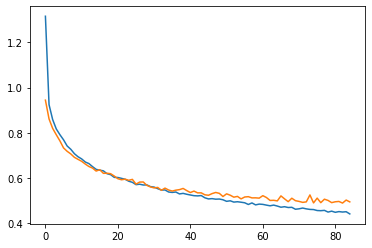

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [ ]:
from keras.models import load_model

In [ ]:
bestmodel = load_model('bestmodel.cover_type')

In [ ]:
bestmodel.evaluate(X_test, ytest)


95/95 [==============================] - 0s 1ms/step - loss: 0.5127 - accuracy: 0.7880


[0.5127115249633789, 0.7880290746688843]

In [ ]:
#assume Bayes error - 0.1  so accuracy = 99

In [ ]:
#Avoidable bias or variance
#steps to solve

#Avoidable bias = bayes accuracy - training accuracy    0.99-0.7987=0.1913
#Variance = training accuracy - validation accuracy     0.7987-0.776=0.0227

#Variance < Avoidable bias

